In [276]:
# 데이터 불러오기
import pandas as pd
train_data = pd.read_csv('C:/Users/bhw11/titanic/titanic/train.csv')
test_data =  pd.read_csv('C:/Users/bhw11/titanic/titanic/test.csv')

#### 각 Feature에 대한 공식문서
- PassangerId / 승객에 대한 고유한 번호
- Survived  0= No 1= Yes
- Pclass(클래스) 1 = 1등석 2 = 2등석 3 = 3등석
- name 이름
- sex 성별
- Age 나이
- SibSp 형제/배우자 수(타이타닉호에 탑승한)
- Parch 부모/자녀 수(타이타닉호에 탑승한) 
- Ticket 티켓 번호
- Fare 티켓 금액
- Cabin 호실 번호
- Embarked 탑승한 항구 (C = Cherbourg, Q = Queenstown, S = Southampton)

In [277]:
# 데이터 살펴보기
print(train_data.shape) #(891,12)
print(test_data.shape) #(418,11)

(891, 12)
(418, 11)


In [278]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [279]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [280]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [281]:
# 결측치 확인
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [282]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

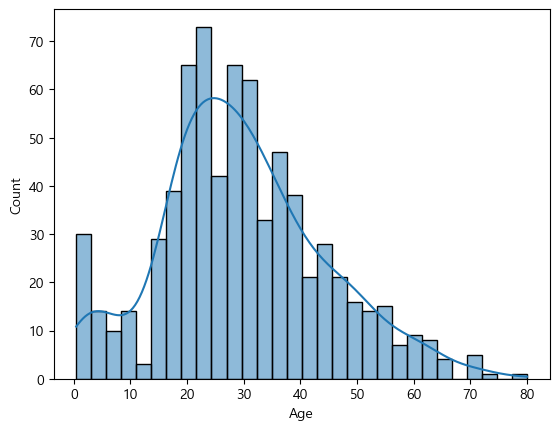

In [283]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns

import matplotlib.pyplot as plt
# 결측치가 있는 데이터 우선 분석하기
# 나이의 분포(히스토그램)
sns.histplot(train_data['Age'], bins = 30, kde =True)



In [284]:
# 생존률에 영향이 없는 것으로 예상되는 데이터 삭제
df_train = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
df_test = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [285]:
# male을 0으로, female을 1로 변환
df_train['Sex'] = df_train['Sex'].replace({'male': 0, 'female': 1})
df_test['Sex'] = df_test['Sex'].replace({'male': 0, 'female': 1})

import pandas as pd

df_train['Embarked'] = df_train['Embarked'].replace({'Q': 0, 'S': 1, 'C': 2 })
df_test['Embarked'] = df_test['Embarked'].replace({'Q': 0, 'S': 1, 'C': 2 })

In [286]:
# 나이와 다른 feature들 간의 상관 관계 계산
correlation_matrix = df_train.corr()

# 나이와 다른 feature들 간의 상관 관계 출력
print(correlation_matrix['Age'])

Survived   -0.077221
Pclass     -0.369226
Sex        -0.093254
Age         1.000000
SibSp      -0.308247
Parch      -0.189119
Fare        0.096067
Embarked    0.042340
Name: Age, dtype: float64


In [287]:
df_train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [288]:
df_train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [289]:
import numpy as np

# 관련이 높은 Pclass와 SibSp를 기반으로 나이 결측치 채워넣기
average_age = df_train.groupby(['Pclass', 'SibSp'])['Age'].mean()

# 각각의 평균을 반올림한 후 정수로 변환하여 채워넣기
for idx, age in average_age.items():
    if not np.isnan(age):
        # 해당 그룹의 평균 나이를 반올림하고 정수로 변환하여 결측치를 채웁니다.
        filled_age = int(round(age))
        
        # 결측치를 채워넣을 조건을 만족하는 행을 찾아 'Age' 열 값을 채웁니다.
        condition = (df_train['Pclass'] == idx[0]) & (df_train['SibSp'] == idx[1]) & (df_train['Age'].isnull())
        df_train.loc[condition, 'Age'] = filled_age

In [290]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         7
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [291]:
# 나머지 Age 열의 결측치는 7개밖에 되지 않으므로 평균으로 채우기
mean_age = df_train['Age'].mean()  # 훈련 데이터의 Age 열의 평균값 계산

# 결측치를 평균값으로 채움
df_train['Age'].fillna(mean_age, inplace=True)
# 결측치를 평균값으로 채운 후 정수로 변환하여 채워넣기
df_train['Age'] = df_train['Age'].apply(lambda x: int(round(x)))
# 테스트 데이터에도 동일하게 적용
df_test['Age'].fillna(mean_age, inplace=True)
df_test['Age'] = df_test['Age'].apply(lambda x: int(round(x)))

In [292]:
# 남은 결측치 확인
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [293]:
# 남은 결측치 확인
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [294]:
# Fare 열의 결측치는 하나이므로 평균값으로 채우기
fare_mean = df_test['Fare'].mean()
df_test['Fare'].fillna(fare_mean, inplace=True)

In [295]:
# Embarked 열의 결측치는 2개밖에 안되고, 1(S) 데이터가 대부분이므로 결측치도 S로 채움
df_train['Embarked'].fillna(1, inplace=True)

In [296]:
# 결측치가 모두 사라진 것을 확인
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [297]:
# 결측치가 모두 사라진 것을 확인
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [298]:
df_train.to_csv('train_data_changed4.csv', index=False)

In [299]:
import pandas as pd

# 'Embarked' 열에 대해 원-핫 인코딩 적용
df_train = pd.get_dummies(df_train, columns=['Embarked'])
df_test = pd.get_dummies(df_test, columns=['Embarked'])

# 열 이름 변경
df_train.rename(columns={'Embarked_0.0': 'Embarked_0', 'Embarked_1.0': 'Embarked_1', 'Embarked_2.0': 'Embarked_2'}, inplace=True)
df_test.rename(columns={'Embarked_0.0': 'Embarked_0', 'Embarked_1.0': 'Embarked_1', 'Embarked_2.0': 'Embarked_2'}, inplace=True)

In [300]:
df_train.to_csv('train_data_two.csv', index=False)

In [301]:
# 생존자 수 확인
print(df_train['Survived'].value_counts()) # 549명 사망, 342명 생존

Survived
0    549
1    342
Name: count, dtype: int64


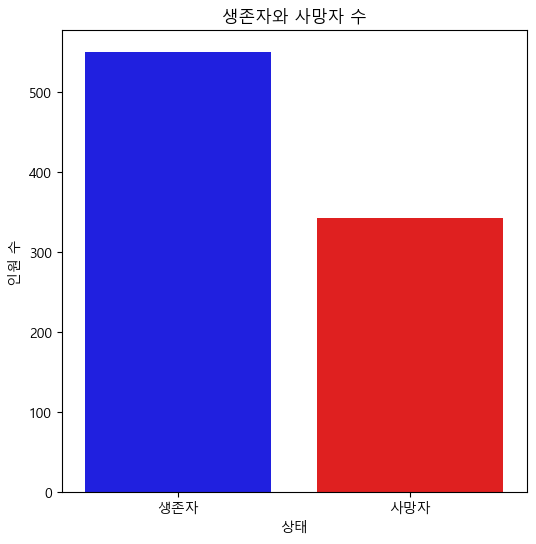

In [302]:
# 생존자와 사망자 비율 시각화
plt.figure(figsize=(6,6))
sns.countplot(x='Survived', data=df_train, palette=['blue', 'red'])
plt.title('생존자와 사망자 수')
plt.xlabel('상태')
plt.ylabel('인원 수')

# x축 눈금 레이블 변경
xtick_labels = ['생존자', '사망자']
plt.xticks([0, 1], xtick_labels)

plt.show()

### 객실 등급에 따른 생존율

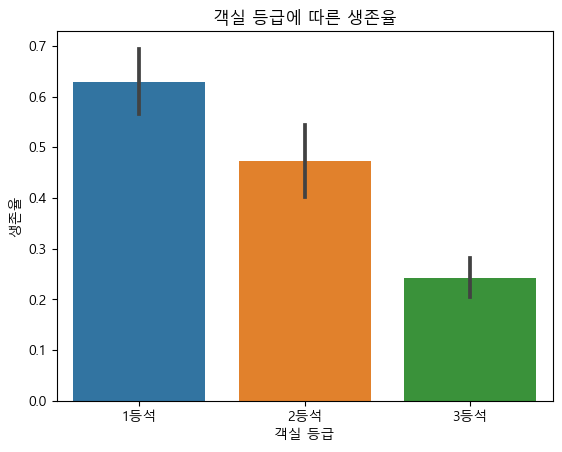

In [303]:
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.title('객실 등급에 따른 생존율')
plt.xlabel('객실 등급')
plt.ylabel('생존율')

# x축 눈금 레이블 변경
xtick_labels = ['1등석', '2등석','3등석']
plt.xticks([0, 1, 2], xtick_labels)
plt.show()



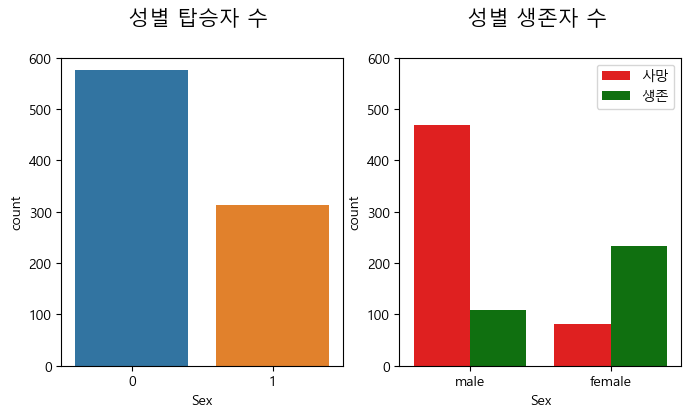

In [304]:
# 색상 변경
palette_colors = {0: 'red', 1: 'green'}

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].set_title("성별 탑승자 수 \n", size=15)
sns.countplot(x="Sex", data=df_train, ax=axes[0])
axes[0].set_ylim([0, 600])  # y축 범위 설정

axes[1].set_title("성별 생존자 수 \n", size=15)
sns.countplot(x="Sex", hue="Survived", data=train_data, ax=axes[1], palette=palette_colors)
axes[1].legend(labels=['사망', '생존'])
axes[1].set_ylim([0, 600])  # y축 범위 설정

plt.show()

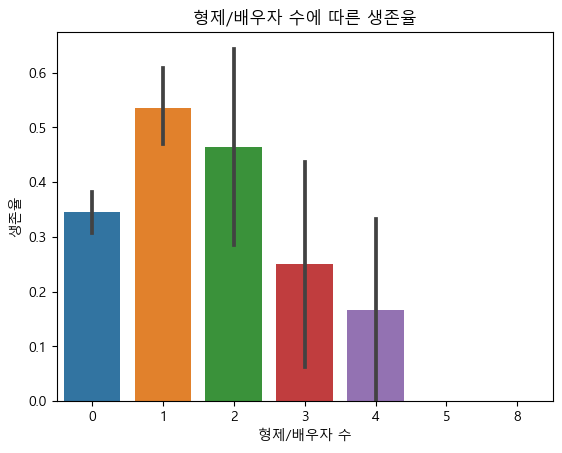

In [305]:
sns.barplot(x='SibSp', y='Survived', data=df_train)
plt.title('형제/배우자 수에 따른 생존율')
plt.xlabel('형제/배우자 수')
plt.ylabel('생존율')
plt.show()

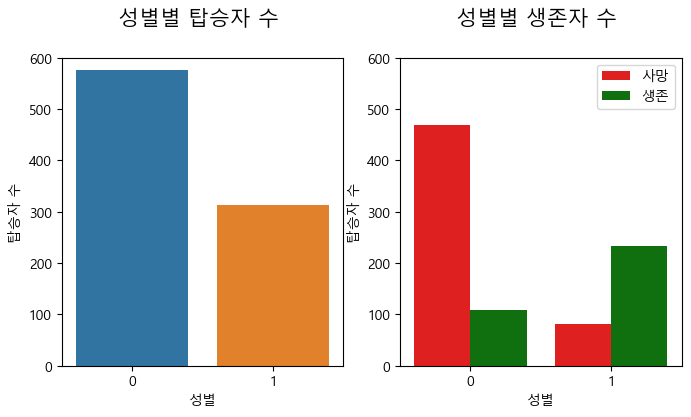

In [306]:
# 성별 데이터를 가공하여 0은 '남성', 1은 '여성'으로 변환
train_data['Sex'] = train_data['Sex'].map({0: '남성', 1: '여성'})

# 색상 설정
palette_colors = {0: 'red', 1: 'green'}

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# 첫 번째 그래프: 성별 탑승자 수
axes[0].set_title("성별별 탑승자 수 \n", size=15)
sns.countplot(x="Sex", data=df_train, ax=axes[0])
axes[0].set_ylim([0, 600])  # y축 범위 설정
axes[0].set_xlabel("성별")
axes[0].set_ylabel("탑승자 수")

# 두 번째 그래프: 성별 생존자 수
axes[1].set_title("성별별 생존자 수 \n", size=15)
sns.countplot(x="Sex", hue="Survived", data=df_train, ax=axes[1], palette=palette_colors)
axes[1].legend(labels=['사망', '생존'])
axes[1].set_ylim([0, 600])  # y축 범위 설정
axes[1].set_xlabel("성별")
axes[1].set_ylabel("탑승자 수")

plt.show()

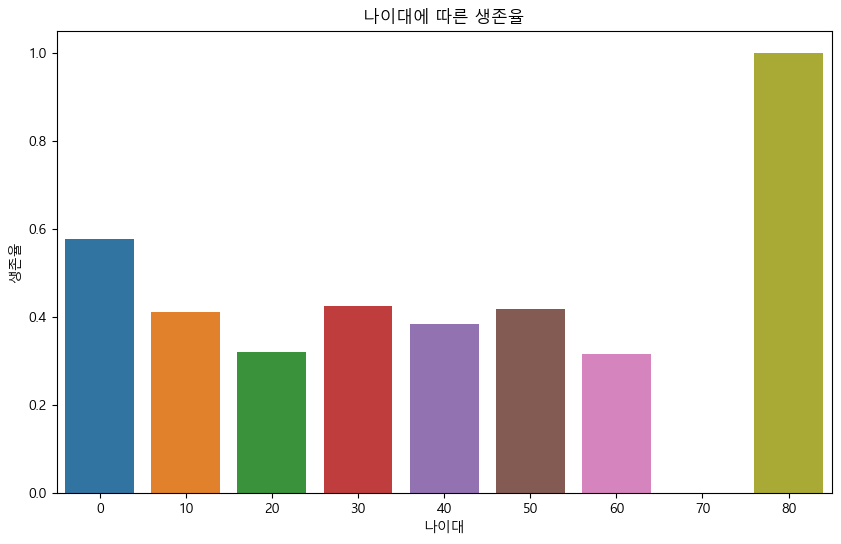

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 구간별로 변환할 나이의 범위와 레이블 설정
age_bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89]
age_labels = [i for i in range(0, 90, 10)]

# 나이를 구간별로 변환하여 새로운 열 추가
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# 구간별 생존율 계산
age_group_survived = df_train.groupby(['AgeGroup', 'Survived']).size().unstack()
age_group_survival_rate = age_group_survived[1] / (age_group_survived[0] + age_group_survived[1])

# 구간별 생존율 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=age_group_survival_rate.index.astype(str), y=age_group_survival_rate.values)
plt.title('나이대에 따른 생존율')
plt.xlabel('나이대')
plt.ylabel('생존율')
plt.show()

In [308]:
# AgeGroup 데이터에서 70대와 80대 구간에 속하는 데이터의 개수 계산
age_0_count = train_data[df_train['AgeGroup'] == 0].shape[0]
age_10_count = train_data[df_train['AgeGroup'] == 10].shape[0]
age_20_count = train_data[df_train['AgeGroup'] == 20].shape[0]
age_30_count = train_data[df_train['AgeGroup'] == 30].shape[0]
age_40_count = train_data[df_train['AgeGroup'] == 40].shape[0]
age_50_count = train_data[df_train['AgeGroup'] == 50].shape[0]
age_60_count = train_data[df_train['AgeGroup'] == 60].shape[0]
age_70_count = train_data[df_train['AgeGroup'] == 70].shape[0]
age_80_count = train_data[df_train['AgeGroup'] == 80].shape[0]



print("0대 데이터 수:", age_0_count)
print("10대 데이터 수:", age_10_count)
print("20대 데이터 수:", age_20_count)
print("30대 데이터 수:", age_30_count)
print("40대 데이터 수:", age_40_count)
print("50대 데이터 수:", age_50_count)
print("60대 데이터 수:", age_60_count)
print("70대 데이터 수:", age_70_count)
print("80대 데이터 수:", age_80_count)

0대 데이터 수: 66
10대 데이터 수: 105
20대 데이터 수: 342
30대 데이터 수: 215
40대 데이터 수: 89
50대 데이터 수: 48
60대 데이터 수: 19
70대 데이터 수: 6
80대 데이터 수: 1


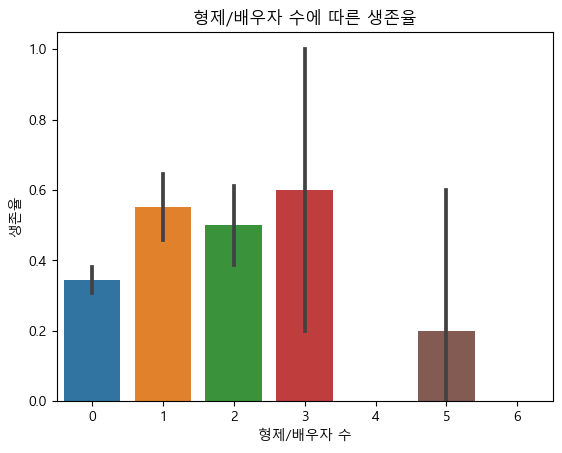

In [309]:
sns.barplot(x='Parch', y='Survived', data=df_train)
plt.title('형제/배우자 수에 따른 생존율')
plt.xlabel('형제/배우자 수')
plt.ylabel('생존율')
plt.show()

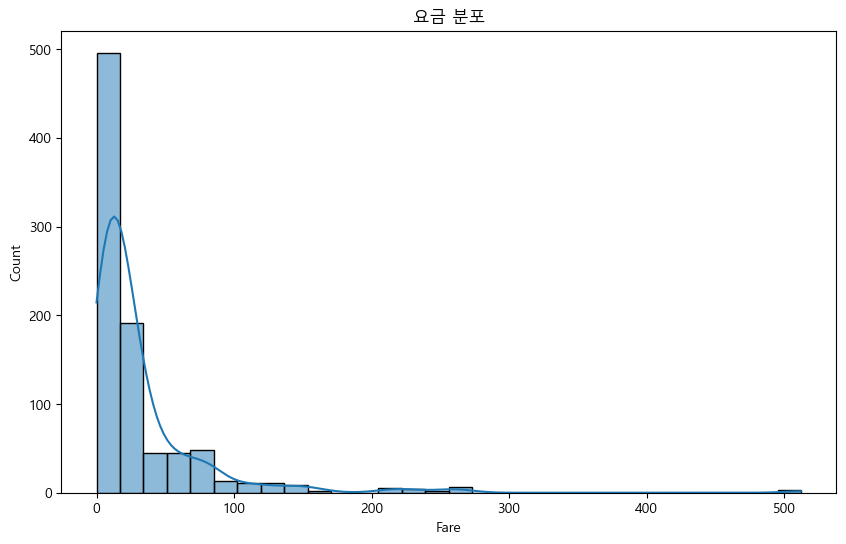

In [310]:
plt.figure(figsize=(10,6))
sns.histplot(x='Fare', data=df_train, bins=30, kde=True)
plt.title('요금 분포')
plt.show()

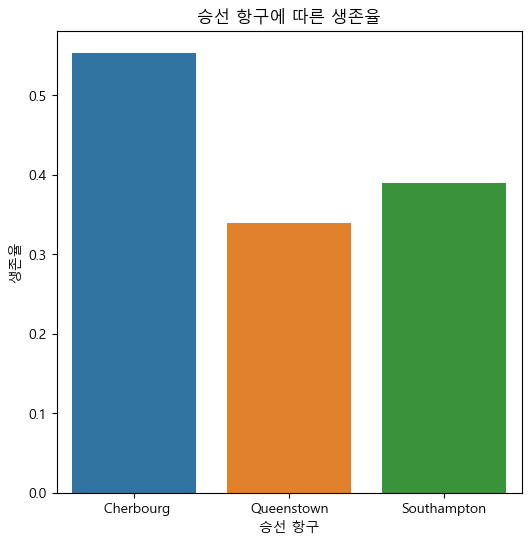

In [311]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 승선 항구별 생존율 계산
embarked_survived = df_train.groupby(['Embarked_0', 'Embarked_1', 'Embarked_2'])['Survived'].mean()

# 튜플로 인덱스 변경
embarked_survived.index = embarked_survived.index.map(lambda x: tuple(map(int, x)))

# 승선 항구에 따른 생존율 시각화
plt.figure(figsize=(6,6))
sns.barplot(x=[str(x) for x in embarked_survived.index], y=embarked_survived.values)
plt.title('승선 항구에 따른 생존율')
plt.xlabel('승선 항구')
plt.ylabel('생존율')
xtick_labels = [' Cherbourg', 'Queenstown', 'Southampton']
plt.xticks([0, 1, 2], xtick_labels)
plt.show()

In [312]:
train_input = df_train.drop('Survived', axis=1).values
train_target = df_train['Survived'].values
print(train_input.shape, train_target.shape)  #(891, 8) (891,)

(891, 10) (891,)


In [313]:
df_train.to_csv('train_data_before_model5.csv', index=False)

In [314]:
from sklearn.preprocessing import StandardScaler

# 스케일링할 변수 선택
numerical_features = ['Age', 'Fare', 'Pclass']
# 스케일링을 위한 StandardScaler 객체 생성
scaler = StandardScaler()

# 훈련 데이터에 대해 스케일링을 수행하고 변환
X_train_scaled = scaler.fit_transform(X_train[numerical_features])

# 테스트 데이터에 대해 스케일링을 수행하고 변환
X_test_scaled = scaler.transform(X_test[numerical_features])

# 스케일링된 데이터를 원본 데이터프레임에 다시 할당
X_train[numerical_features] = X_train_scaled
X_test[numerical_features] = X_test_scaled

### KNN 최근접 분류

In [315]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

# 훈련 데이터와 테스트 데이터 분리
target = df_train['Survived']
train_input, test_input, train_target, test_target = train_test_split(
    df_train, target, random_state=1)

# KNeighborsClassifier 모델 초기화
kn = KNeighborsClassifier()

# 교차 검증을 위한 StratifiedKFold 객체 생성
kfold = StratifiedKFold(n_splits=5)

# 교차 검증 수행
score = cross_validate(kn, train_input, train_target,
                       return_train_score=True, n_jobs=-1,
                       cv=kfold)

# 훈련 세트와 검증 세트의 평균 점수 출력
print("Cross-validation scores:")
print("Train score:", np.mean(score['train_score']))
print("Validation score:", np.mean(score['test_score']))

# 추가로 validation 세트를 사용하여 모델을 검증
kn.fit(train_input, train_target)
val_score = kn.score(test_input, test_target)
print("Validation set score:", val_score)

Cross-validation scores:
Train score: 0.8289691623788021
Validation score: 0.7291437549096622
Validation set score: 0.7399103139013453


In [316]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 예측 결과 출력
kn.fit(train_input, train_target)
pred_train = kn.predict(train_input)
pred_test = kn.predict(test_input)

# 각 평가 지표 계산
precision = precision_score(train_target, pred_train)
recall = recall_score(train_target, pred_train)
f1 = f1_score(train_target, pred_train)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.820627802690583
Recall: 0.7408906882591093
F1-score: 0.7787234042553192


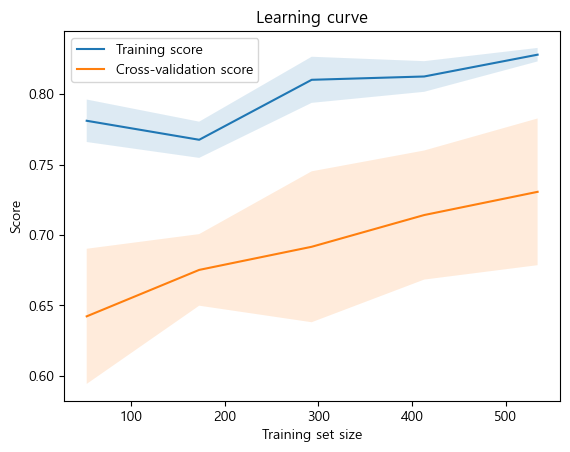

In [317]:
# 학습 곡선
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    kn, train_input, train_target, cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, alpha=0.15)
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, alpha=0.15)
plt.title('Learning curve')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

In [318]:
# 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 준비
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# 그리드 검색 수행
grid_search = GridSearchCV(kn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_input, train_target)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.7366401077320165


### Decision Tree

In [319]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# 특성 선택
features = ['Pclass', 'Sex', 'Age', 'Fare']

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train['Survived'], test_size=0.2, random_state=42)

# 결정 트리 모델 생성
dt_model = DecisionTreeClassifier(random_state=42)

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
grid_search_dt = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params_dt = grid_search_dt.best_params_
print(f'Best Hyperparameters for Decision Tree: {best_params_dt}')

# 테스트 데이터로 예측
y_pred_dt_test = grid_search_dt.predict(X_test)

# 정확도 평가
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print(f'Optimized Decision Tree Model Accuracy on Test Set: {accuracy_dt_test:.4f}')

Best Hyperparameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Optimized Decision Tree Model Accuracy on Test Set: 0.8045


In [320]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 예측 결과 출력
dt_model.fit(train_input, train_target)
pred_train = dt_model.predict(train_input)
pred_test = dt_model.predict(test_input)

# 각 평가 지표 계산
precision = precision_score(train_target, pred_train)
recall = recall_score(train_target, pred_train)
f1 = f1_score(train_target, pred_train)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [322]:
# train 데이터와 test 데이터에서 사용할 특성 선택
train_features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Parch', 'SibSp']
test_features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Parch', 'SibSp']

# train 데이터와 test 데이터에서 선택된 특성만을 사용하여 데이터를 추출
X_train = df_train[train_features]
y_train = df_train['Survived']
X_test = df_test[test_features]

# 모델 훈련
grid_search_dt.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_dt_test = grid_search_dt.predict(X_test)

# test 데이터의 PassengerId 가져오기
passenger_ids = test_data['PassengerId']

# 예측 결과를 DataFrame으로 변환
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': y_pred_dt_test
})

# submission.csv 파일로 저장
submission.to_csv('submission3.csv', index=False)